<a href="https://colab.research.google.com/github/mezkymy/ecommerce-ds/blob/main/Final_Project_DS_Rakamin_Batch_31_Kelompok_4_(Cobra).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# run this to load file directly from kaggle (API key required)
# guide on how to use these commands: https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/
# no need to change anything in this cell, just load kaggle.json to files and run
# or just load Train.csv directly into files and skip this cell
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download prachi13/customer-analytics
! unzip customer-analytics.zip

In [61]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# alternative to load file
from google.colab import files
filenya = files.upload()

In [62]:
# load csv file, create raw data (original copy) and dataframe (df) to manipulate
raw_data = pd.read_csv('Train.csv')
df = raw_data.copy()
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1. Data Exploration

Source: [E-Commerce Shipping Data from Kaggle](https://www.kaggle.com/datasets/prachi13/customer-analytics)

## Context (copied from Kaggle):
An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

## 1.1 Descriptive Analysis

In [63]:
# check columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


No null values detected on every columns

In [64]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [65]:
# check if any ID is duplicated
df[df['ID'].duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


No duplicate ID detected.

ID column can be dropped as it shall not be used in any further analysis.

In [90]:
# drop ID column
df.drop('ID', axis=1)
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 1.2 Univariate Analysis

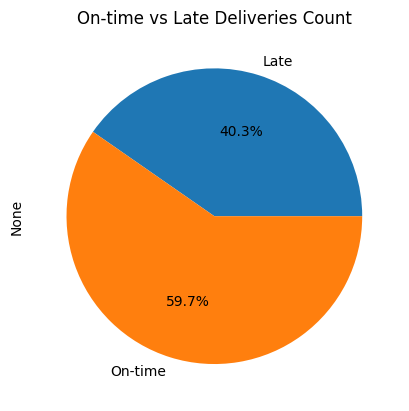

In [89]:
# check ratio ratio on on-time vs late deliveries
df.groupby('Reached.on.Time_Y.N').size().plot(kind='pie', labels=['Late', 'On-time'], autopct='%.1f%%')
plt.title('On-time vs Late Deliveries Count')
plt.show()

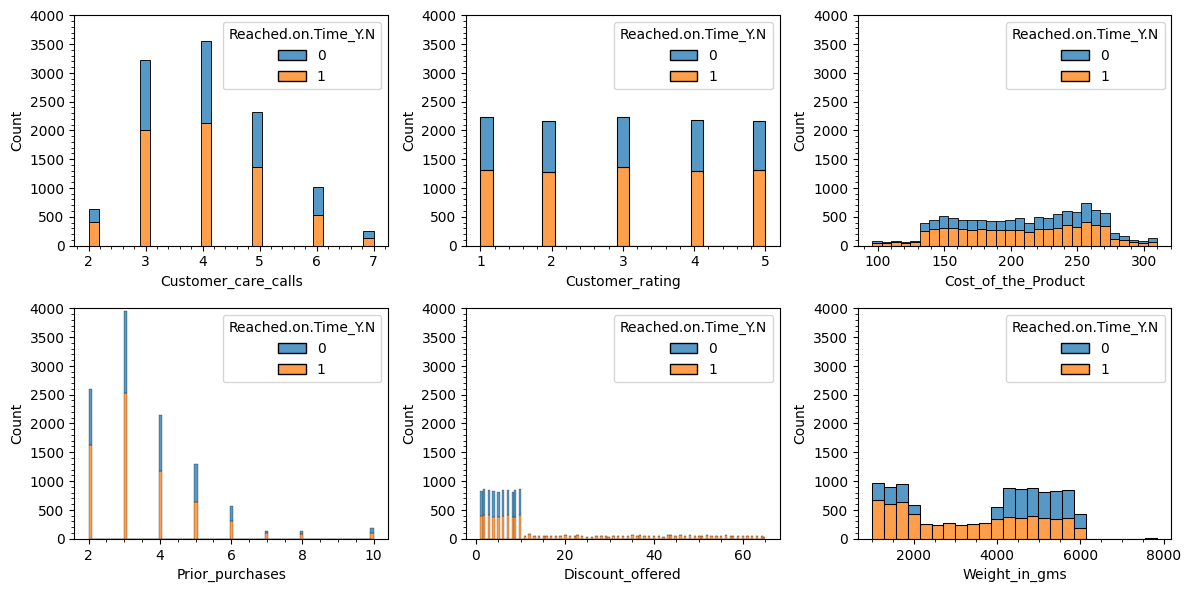

In [98]:
# histogram for numeric columns
numeric_columns = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']

# function to calculate bins based on Freedman-Diaconis (not used)
# def bins_fd(col):
#     n = col.count()
#     q1, q3 = col.quantile([0.25, 0.75])
#     range_tc = col.max() - col.min()
#     IQR = q3 - q1
#     return int(round(np.ceil(((n ** (1/3)) * range_tc)/(2 * IQR)), 0))

fig, axes = plt.subplots(2, 3, figsize=(12, 6))

i = 0

for y in axes:
    for ax in y:
        column = df[numeric_columns[i]]
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax)
        ax.minorticks_on()
        ax.set_ylim(0, 4000)
        i += 1

fig.tight_layout(pad=1)
plt.show()

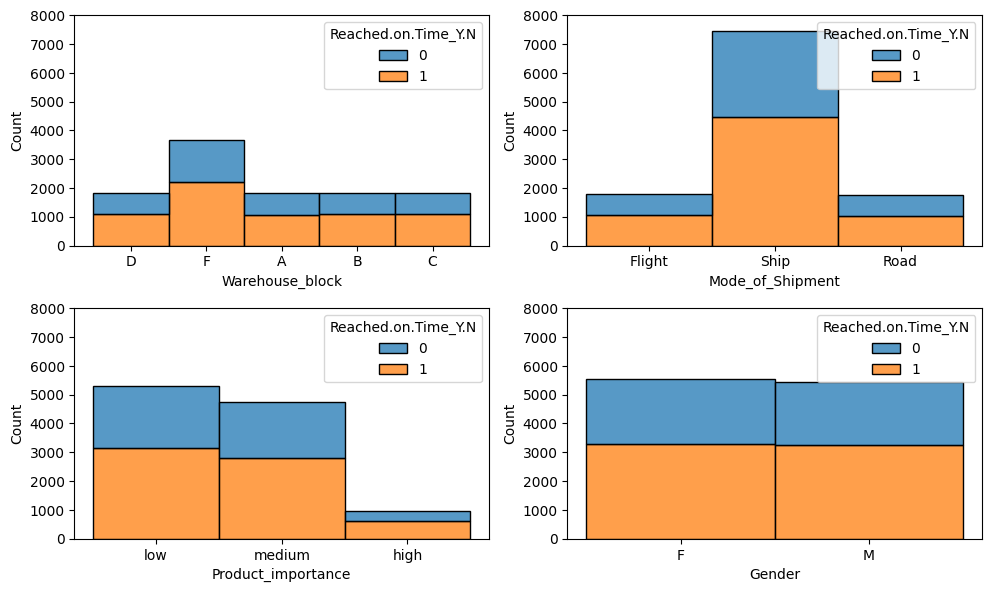

In [97]:
# Create histplot for categorical columns
categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))
i = 0

for y in axes:
    for ax in y:
        try:
            column = categorical_columns[i]
        except:
            break
        sns.histplot(df, x=column, hue='Reached.on.Time_Y.N', multiple='stack', ax=ax) 
        ax.set_ylim(0, 8000)
        i += 1

fig.tight_layout(pad=1)
plt.show()

### Insights based on histograms
1. Distribution of `Customer_care_calls` and `Cost_of_the_product` are relatively normal, while the distribution of `Prior_purchases` and `Discount_offered` are positively skewed
2. Distribution of `Weight_in_gms` shows two peaks (bimodal), which might indicate an existance of two categories/segmentations

### Insights based on count plots
1. Warehouse `F` stores the most amount of items, while other warehouses stores  similar amount of items
2. Most items are shipped using the mode `Ship` (around ~70% of total shipments)



tambahan: datanya perlu diapain lagi berdasarkan temuan/insight tsb?


## 1.3 Multivariate Analysis

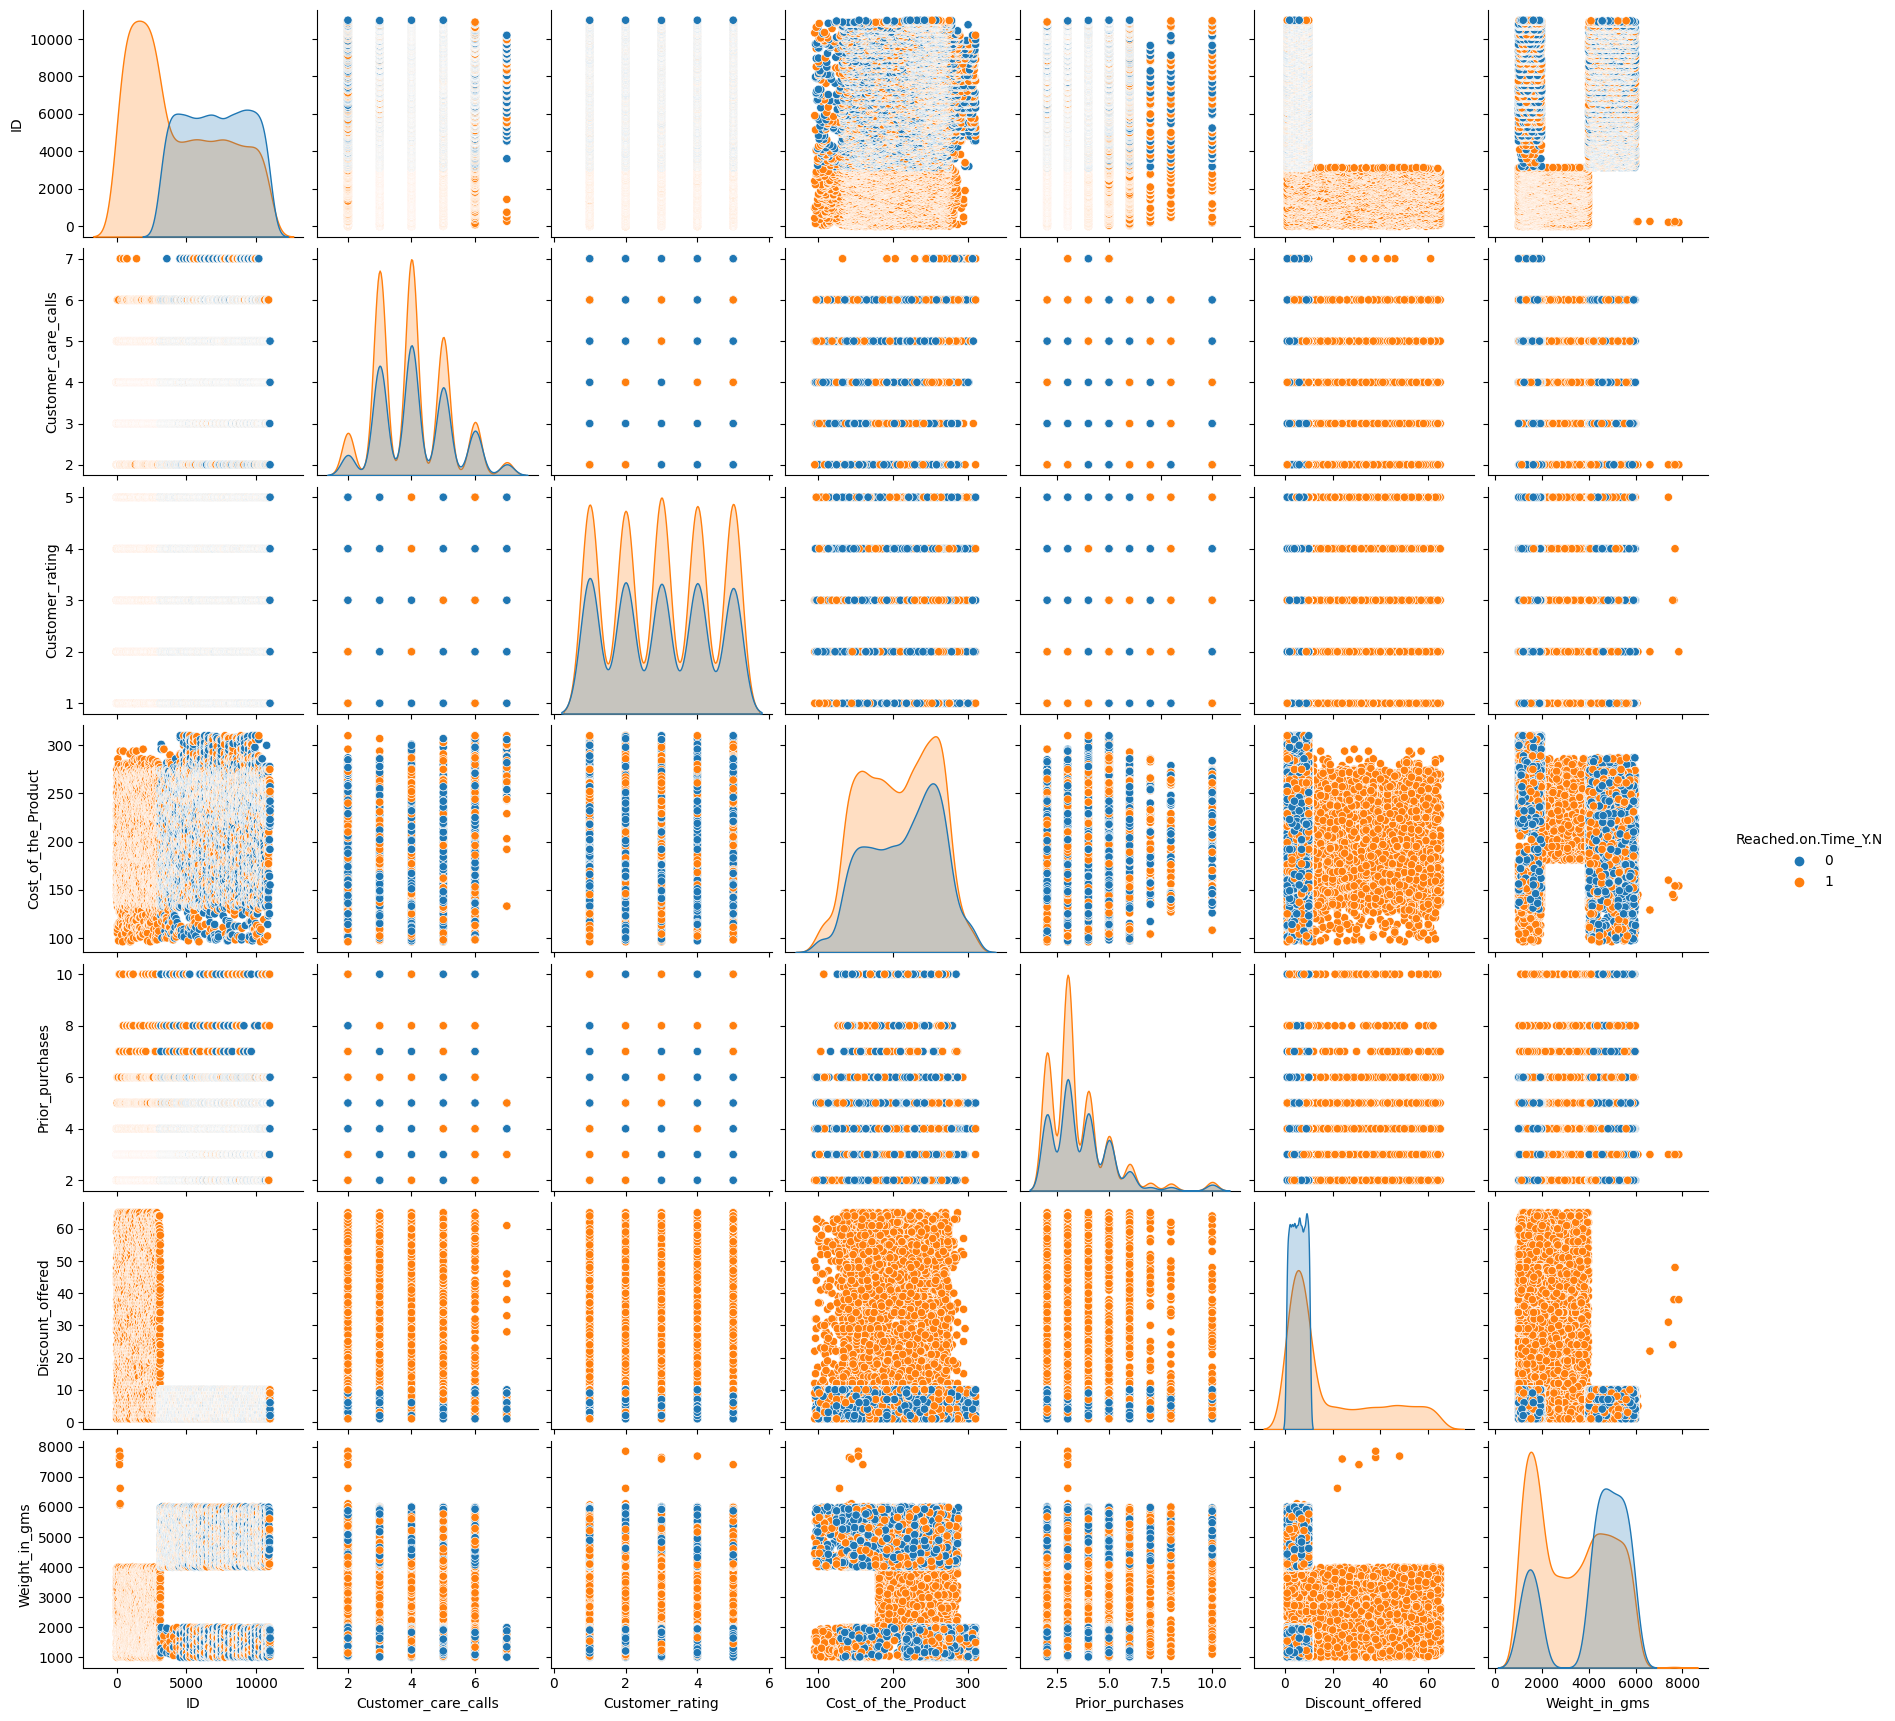

In [93]:
# create pairplot for all numerical features
sns.pairplot(df, hue='Reached.on.Time_Y.N')
plt.show()

- adakah data yg cardinalitynya tinggi?
- apakah perlu encoding (ordinal/one-hot)

In [71]:
# # tambahan grafik (Mufid)
# sns.kdeplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df) 
# plt.show()

# notes: kdeplot are already included in pair plot

- hal ini menunjukkan dari setiap jumlah customer care calls yang masuk, lebih banyak barang yang datang tepat waktu
- hipotesis : belum tentu customer melakukan telpon mungkin customer melakukan telponan ke perusahaan untuk ngecek barang udah sampe mana(?)

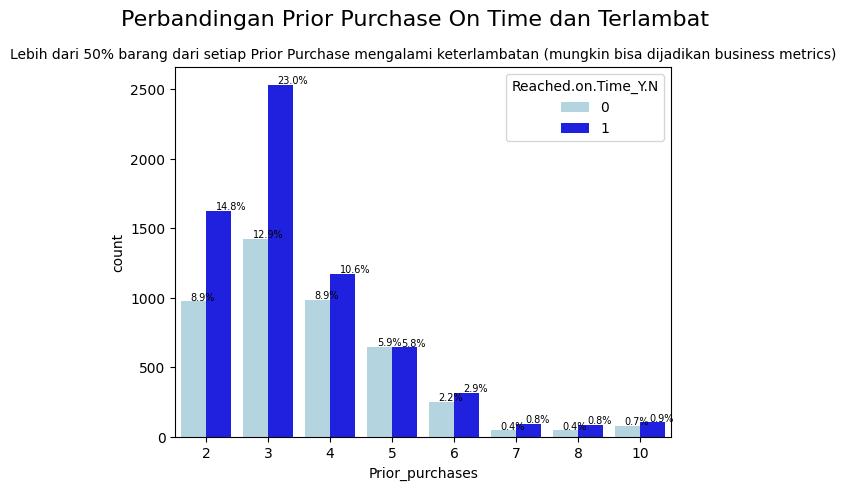

In [72]:
# menambahkan grafik (MUFID)
ax = sns.countplot(x=df['Prior_purchases'], hue=df['Reached.on.Time_Y.N'], palette={0: 'lightblue', 1: 'blue'})
total = len(df['Prior_purchases'])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 10
    ax.annotate(percentage, (x, y), size = 7)

plt.suptitle('Perbandingan Prior Purchase On Time dan Terlambat', y=1, fontsize=16)
plt.title('Lebih dari 50% barang dari setiap Prior Purchase mengalami keterlambatan (mungkin bisa dijadikan business metrics)', fontsize=10)

plt.show()

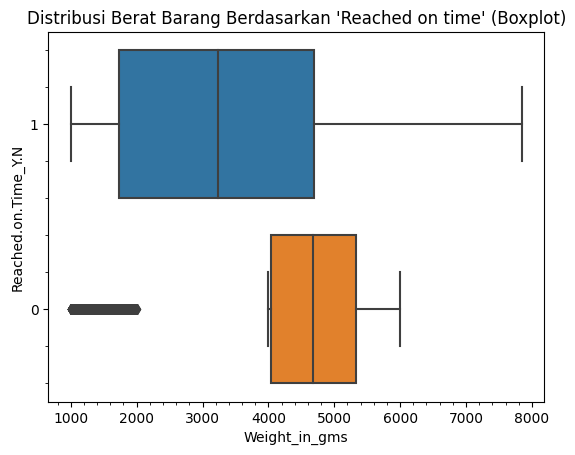

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Weight_in_gms", y="Reached.on.Time_Y.N").set(title="Distribusi Berat Barang Berdasarkan 'Reached on time' (Boxplot)")

plt.minorticks_on()
plt.show()

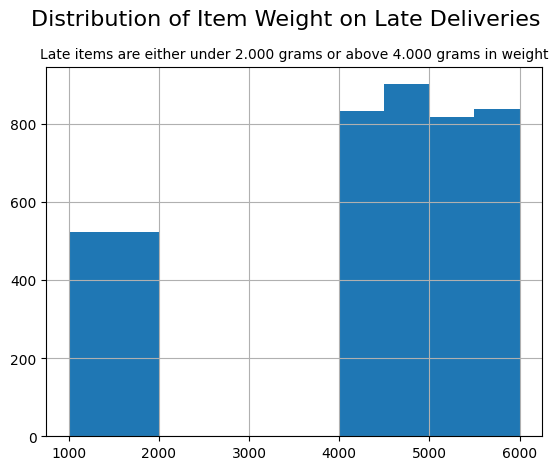

In [ ]:
df[df['Reached.on.Time_Y.N'] == 0].hist(column = "Weight_in_gms")
plt.suptitle('Distribution of Item Weight on Late Deliveries', y=1, fontsize=16)
plt.title('Late items are either under 2.000 grams or above 4.000 grams in weight', fontsize=10)
plt.show()

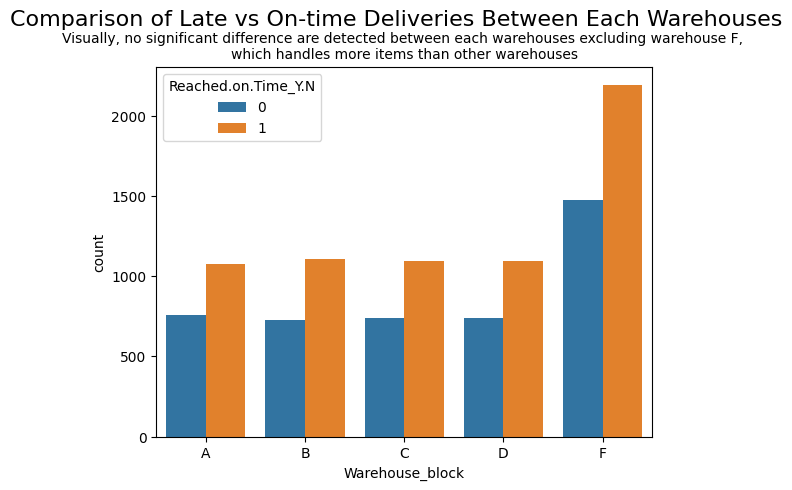

In [ ]:
sns.countplot(data=df, x="Warehouse_block", order=['A', 'B', 'C', 'D', 'F'], hue="Reached.on.Time_Y.N")
plt.suptitle('Comparison of Late vs On-time Deliveries Between Each Warehouses', y=1, fontsize=16)
plt.title(f'Visually, no significant difference are detected between each warehouses excluding warehouse F, \nwhich handles more items than other warehouses', fontsize=10)
plt.show()

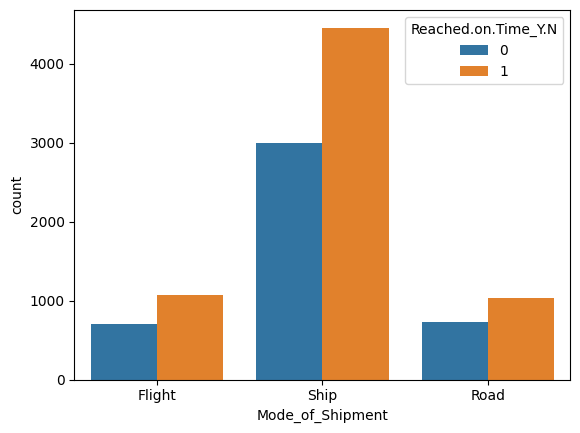

In [ ]:
sns.countplot(data=df, x="Mode_of_Shipment", hue="Reached.on.Time_Y.N")
plt.show()

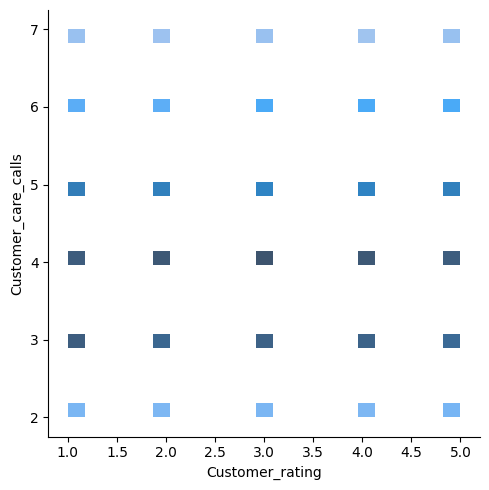

In [ ]:
g = sns.displot(data=df, x="Customer_rating", y="Customer_care_calls")
plt.show()

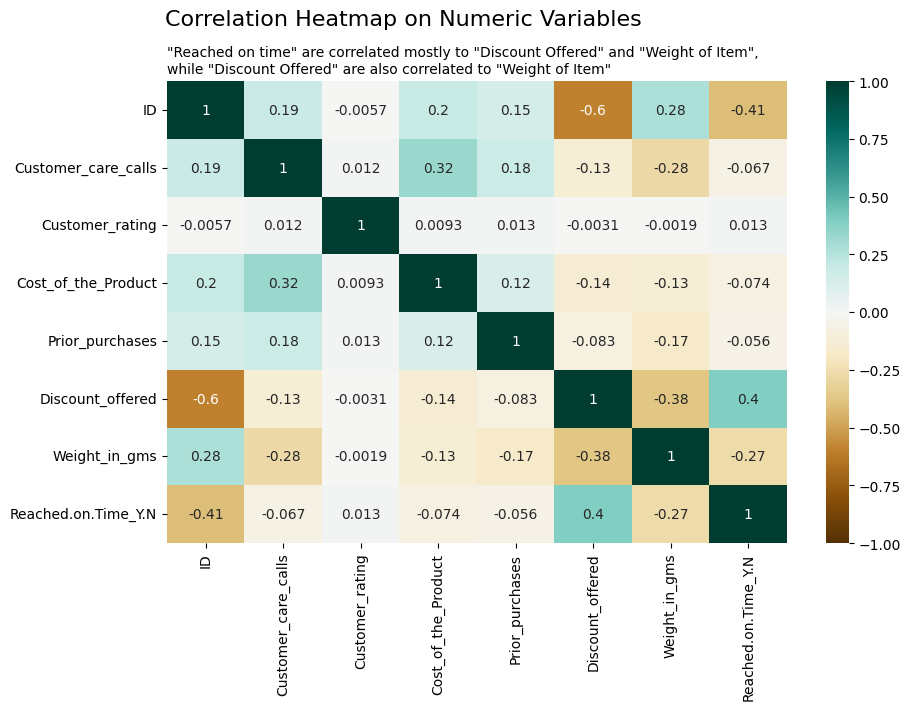

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.suptitle('Correlation Heatmap on Numeric Variables', horizontalalignment='right', x=0.6, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)
plt.show()

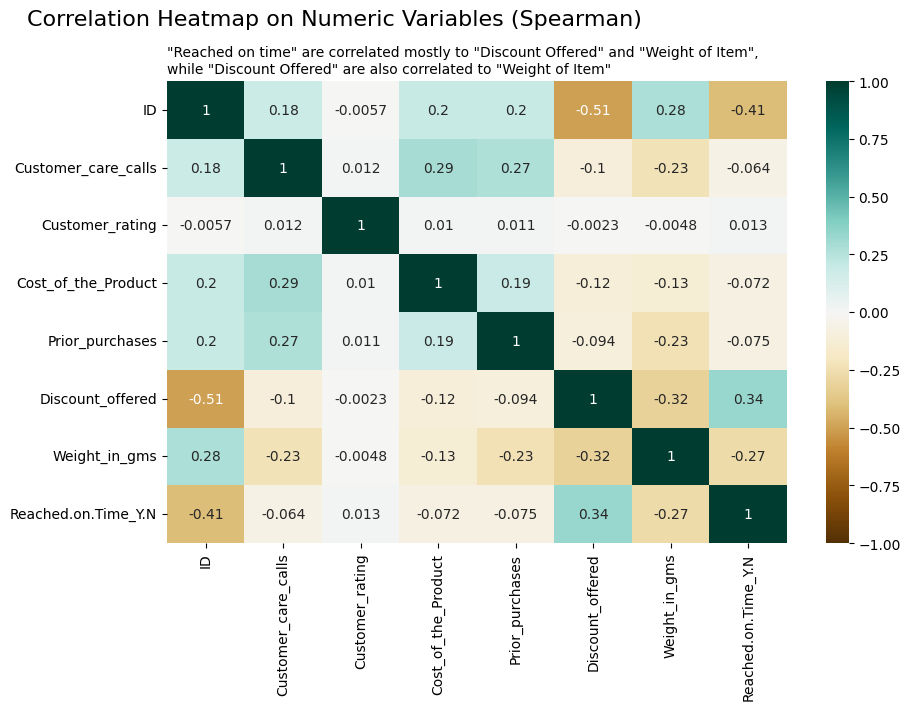

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.suptitle('Correlation Heatmap on Numeric Variables (Spearman)', horizontalalignment='right', x=0.6, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)
plt.show()

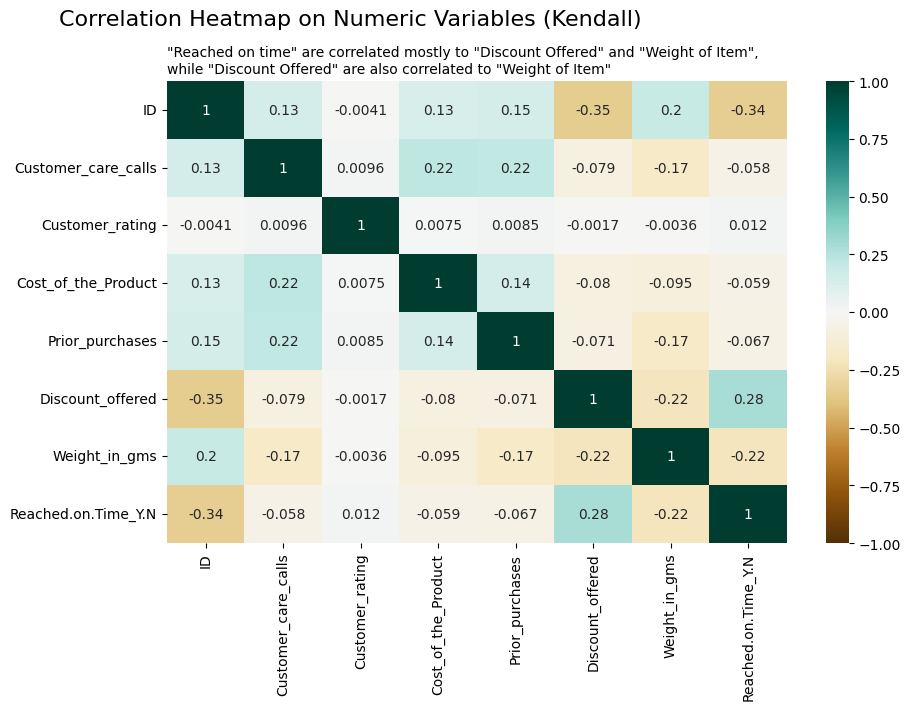

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(method='kendall'), annot=True, cmap='BrBG', vmin=-1, vmax=1, fmt='.2g')
plt.suptitle('Correlation Heatmap on Numeric Variables (Kendall)', horizontalalignment='right', x=0.6, y=1, fontsize=16)
plt.title(f'"Reached on time" are correlated mostly to "Discount Offered" and "Weight of Item", \nwhile "Discount Offered" are also correlated to "Weight of Item"', loc='left', fontsize=10)
plt.show()

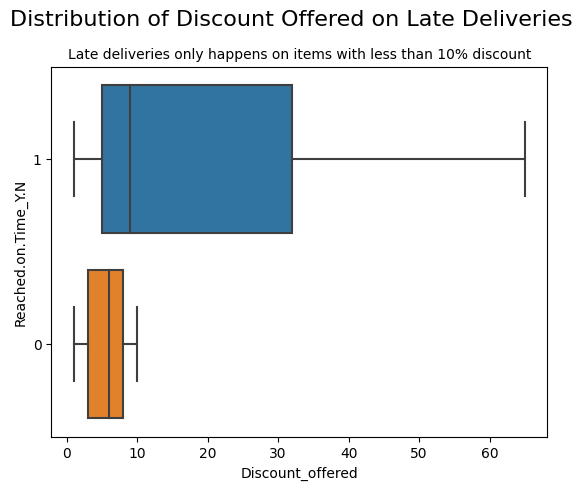

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Discount_offered", y='Reached.on.Time_Y.N')
plt.suptitle('Distribution of Discount Offered on Late Deliveries', y=1, fontsize=16)
plt.title('Late deliveries only happens on items with less than 10% discount', fontsize=10)
plt.show()

In [ ]:
# coba - coba
df.groupby('Mode_of_Shipment').agg({'Weight_in_gms' : 'mean'})

,Weight_in_gms
Mode_of_Shipment,
Flight,3629.378165
Road,3649.550568
Ship,3631.457518


<Axes: xlabel='Weight_in_gms', ylabel='Mode_of_Shipment'>

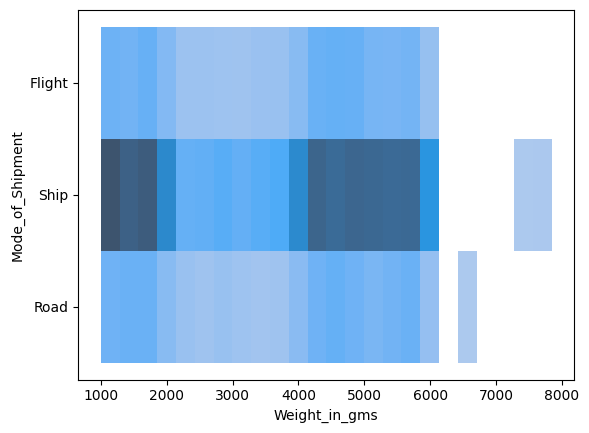

In [ ]:
# coba - coba
sns.histplot(x='Weight_in_gms', y='Mode_of_Shipment', data=df)

<Axes: xlabel='Weight_in_gms', ylabel='Mode_of_Shipment'>

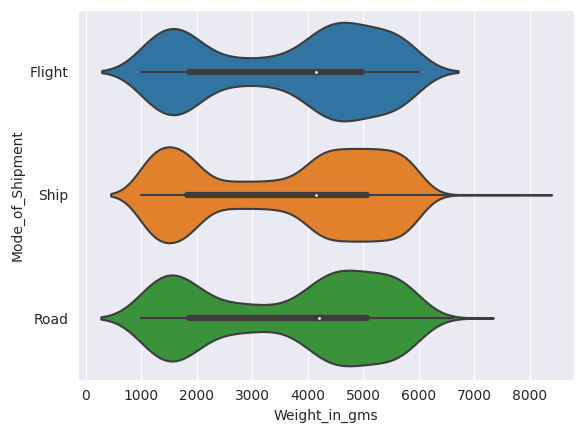

In [ ]:
# coba ganti grafik ya mbak (MUFID)
sns.violinplot(x='Weight_in_gms', y='Mode_of_Shipment', data=df)

Text(1.5, 0, 'Distribusi pengiriman barang yang\ntidak merata di ketiga armada,\ndimana 67.84% pengiriman menggunakan kapal')

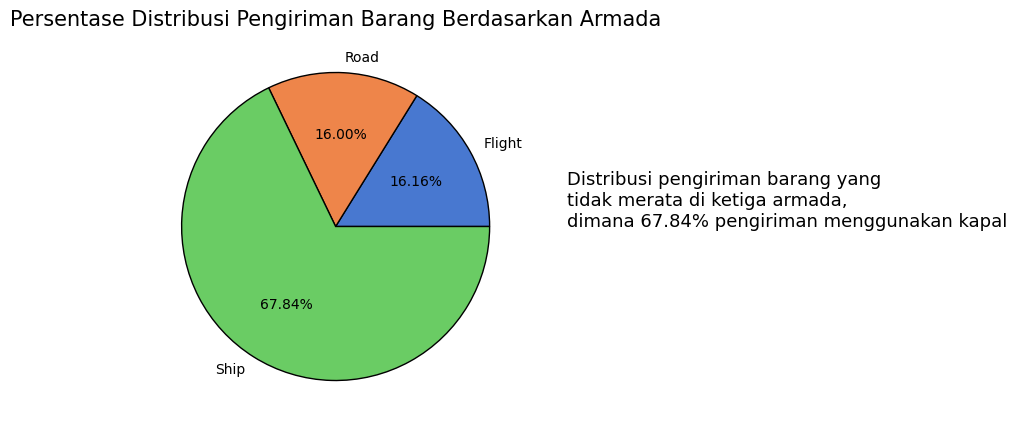

In [ ]:
#Filtering Kolom
total = df.groupby('Mode_of_Shipment').agg({'ID' : 'count'}).reset_index()
total['rasio'] = round(total['ID']*100/10999, 2)

#Visualisasi Data
plt.figure(figsize=(10,5))
plt.pie(total['rasio'], labels=total['Mode_of_Shipment'], colors=sns.color_palette('muted'),
          wedgeprops={'edgecolor':'k'}, autopct='%.2f%%')

#Judul
plt.title('Persentase Distribusi Pengiriman Barang Berdasarkan Armada', fontsize=15)

#Keterangan
plt.text(x=1.5, y=0, s='Distribusi pengiriman barang yang\ntidak merata di ketiga armada,\ndimana 67.84% pengiriman menggunakan kapal', fontsize=13)

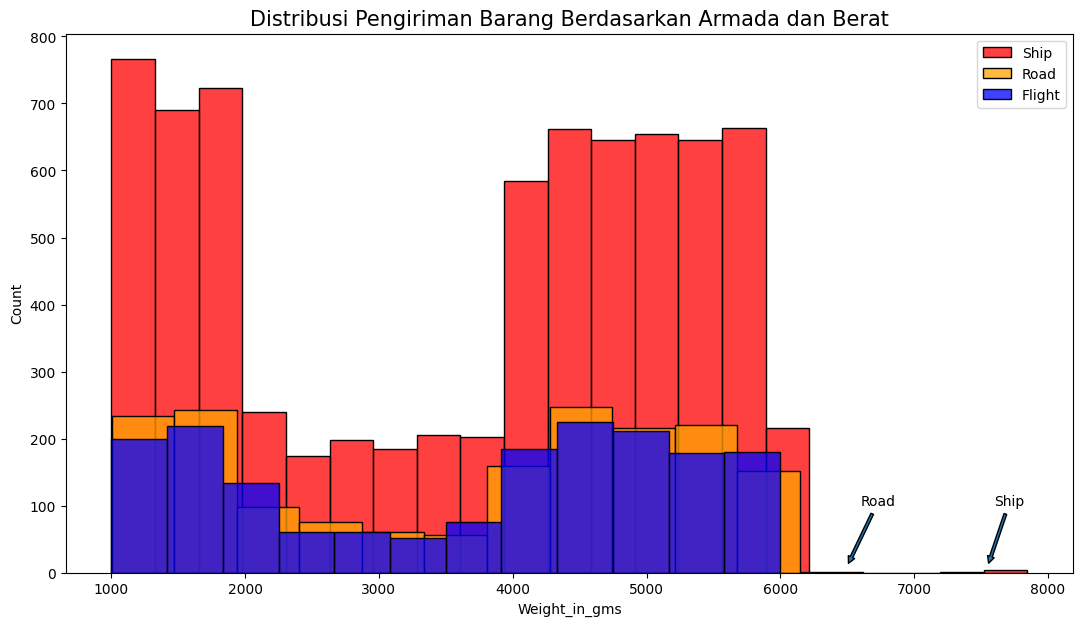

In [ ]:
#Filtering Kolom
flight = df[df['Mode_of_Shipment']=='Flight']
ship = df[df['Mode_of_Shipment']=='Ship']
road = df[df['Mode_of_Shipment']=='Road']

#Visualisasi Distribusi Barang
plt.figure(figsize=(13,7))
sns.histplot(x='Weight_in_gms', color='red', data=ship, label='Ship')
sns.histplot(x='Weight_in_gms', color ='orange', data=road, label='Road')
sns.histplot(x='Weight_in_gms', color='blue', data=flight, label='Flight')

#Judul
plt.title('Distribusi Pengiriman Barang Berdasarkan Armada dan Berat', fontsize=15)

#Keterangan Tambahan
plt.annotate('Road',
            xy=(6500,10), xytext=(6600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))
plt.annotate('Ship',
            xy=(7550,10), xytext=(7600, 100), arrowprops=dict(ec='black', arrowstyle='simple',))

#Legenda
plt.legend(loc=1)

<Axes: xlabel='Mode_of_Shipment', ylabel='Weight_in_gms'>

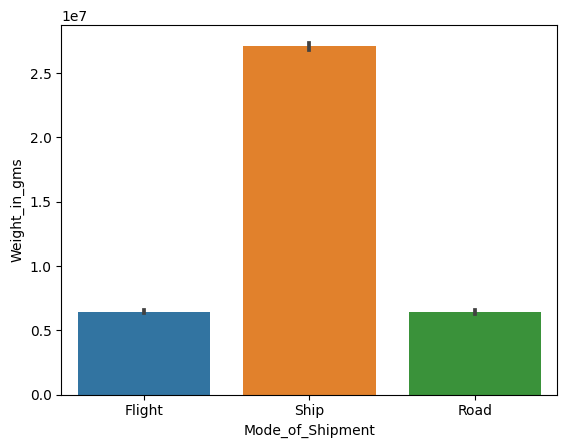

In [ ]:
# coba - coba
sns.barplot(x='Mode_of_Shipment', y='Weight_in_gms', estimator=sum, data=df)

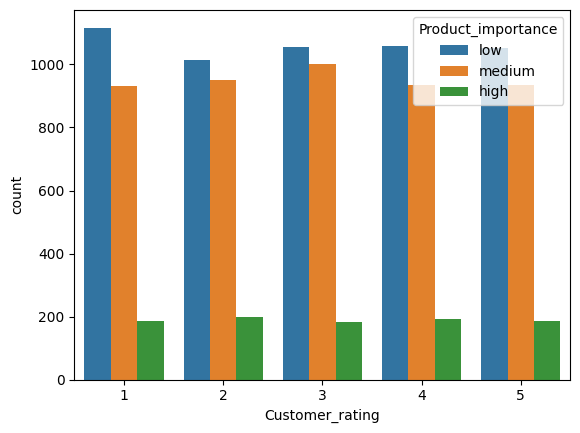

In [ ]:
sns.countplot(data=df, x="Customer_rating", hue="Product_importance")
plt.show()

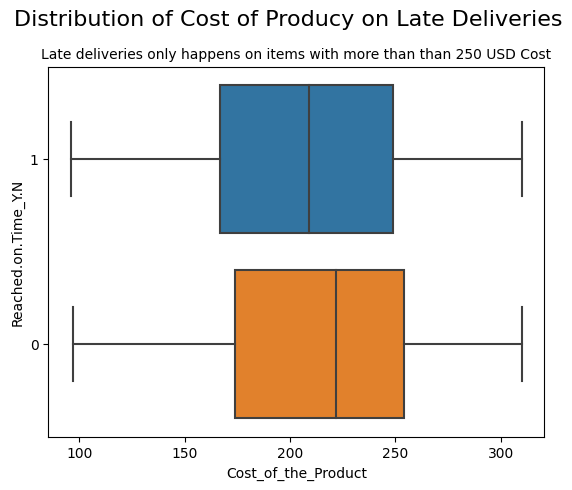

In [ ]:
sns.boxplot(data=df.astype({'Reached.on.Time_Y.N':'string'}), x="Cost_of_the_Product", y='Reached.on.Time_Y.N')
plt.suptitle('Distribution of Cost of Producy on Late Deliveries', y=1, fontsize=16)
plt.title('Late deliveries only happens on items with more than than 250 USD Cost', fontsize=10)
plt.show()

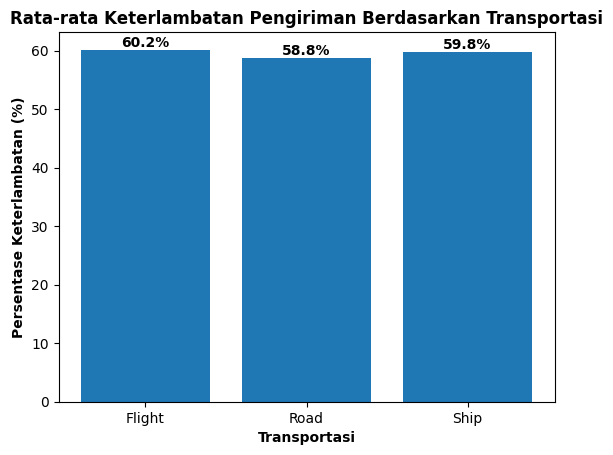

In [ ]:
# Calculate late delivery percentage for each mode of transport
delay_by_shipment = df.groupby('Mode_of_Shipment')['Reached.on.Time_Y.N'].mean() * 100

# Membuat bar plot
plt.bar(delay_by_shipment.index, delay_by_shipment.values)

# Menambahkan label untuk setiap bar
for i, v in enumerate(delay_by_shipment.values):
    plt.text(i, v+0.5, str(round(v,1)) + '%', ha='center', fontweight='bold')

# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.title('Rata-rata Keterlambatan Pengiriman Berdasarkan Transportasi', fontweight='bold')
plt.xlabel('Transportasi', fontweight='bold')
plt.ylabel('Persentase Keterlambatan (%)', fontweight='bold')

# Menampilkan grafik
plt.show()

### Insight:

Pengiriman melalui penerbangan memiliki tingkat keterlambatan pengiriman yang lebih tinggi dibandingkan pengiriman melalui kapal atau jalan darat.


### Rekomendasi Bisnis:

Evaluasi ulang pengiriman melalui penerbangan, pertimbangkan opsi pengiriman alternatif seperti kapal atau jalan darat, atau tingkatkan kualitas layanan pengiriman melalui penerbangan.

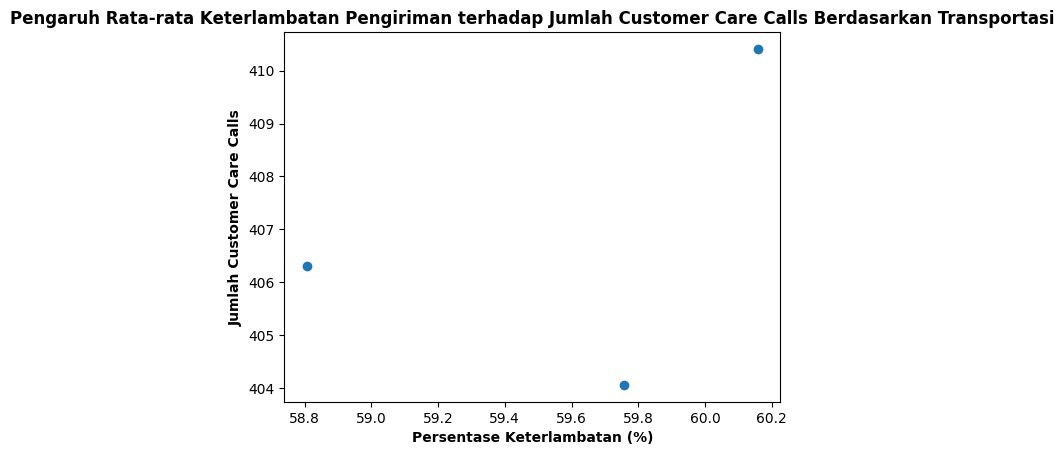

In [ ]:
# Menggabungkan data rata-rata keterlambatan pengiriman dan jumlah customer care calls berdasarkan mode of shipment
delay_calls = df.groupby('Mode_of_Shipment')[['Reached.on.Time_Y.N', 'Customer_care_calls']].mean() * 100

# Membuat scatter plot
plt.scatter(delay_calls['Reached.on.Time_Y.N'], delay_calls['Customer_care_calls'])

# Menambahkan label pada sumbu x dan y, serta judul grafik
plt.title('Pengaruh Rata-rata Keterlambatan Pengiriman terhadap Jumlah Customer Care Calls Berdasarkan Transportasi', fontweight='bold')
plt.xlabel('Persentase Keterlambatan (%)', fontweight='bold')
plt.ylabel('Jumlah Customer Care Calls', fontweight='bold')

# Menampilkan grafik
plt.show()

### Insight
Semakin tinggi persentase keterlambatan pengiriman, semakin banyak jumlah customer care calls yang diterima oleh perusahaan.

Hal tersebut menunjukkan bahwa keterlambatan pengiriman dapat mempengaruhi kepuasan pelanggan, sehingga pelanggan perlu menghubungi customer care untuk mendapatkan informasi lebih lanjut mengenai status pengiriman.

### Rekomendasi Bisnis:
Perusahaan perlu meningkatkan performa pengiriman agar dapat mengurangi jumlah customer care calls dan meningkatkan kepuasan pelanggan. Perusahaan juga perlu meningkatkan kualitas customer care dengan memberikan pelatihan dan pengembangan keterampilan agar dapat memberikan layanan yang lebih baik dan memuaskan pelanggan.

In [ ]:
# Mencari hubungan antara Mode of shipment, warehouse block & Dicount offered (MUFID)

df_br = df.groupby(['Mode_of_Shipment', 'Warehouse_block']).agg({'Discount_offered': ['mean', 'sum'],'Reached.on.Time_Y.N':'sum'}).reset_index()
df_br

Mode_of_Shipment Warehouse_block Discount_offered         \
                                                mean    sum   
0            Flight               A        13.050505   3876   
1            Flight               B        12.584459   3725   
2            Flight               C        12.725424   3754   
3            Flight               D        13.208754   3923   
4            Flight               F        13.697635   8109   
5              Road               A        13.163265   3870   
6              Road               B        13.037415   3833   
7              Road               C        13.748299   4042   
8              Road               D        12.496575   3649   
9              Road               F        13.027304   7634   
10             Ship               A        13.277778  16491   
11             Ship               B        13.366050  16614   
12             Ship               C        13.477492  16766   
13             Ship               D        13.206426  16442   
14             Ship               F        13.811897  34364   

   Reached.on.Time_Y.N  
                   sum  
0                  174  
1                  177  
2                  184  
3                  178  
4                  356  
5                  168  
6                  172  
7                  169  
8                  174  
9                  352  
10                 733  
11                 755  
12                 741  
13                 744  
14                1486

In [91]:
# masih belum jadi (MUFID)
fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(data=df, x='Warehouse_block', y='Discount_offered', ax=ax)
for i, val in enumerate(df['Discount_offered']):
    ax.text(i, val, round(val,3), horizontalalignment='center', fontsize=12)

ax.set_title('Discount Offered by Warehouse Block')
ax.set_xlabel('Warehouse Block')
ax.set_ylabel('Discount Offered')
plt.show()

ValueError: ignored

<Figure size 800x600 with 1 Axes>